In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qclab.simulation as simulation
from qclab.models.spin_boson import SpinBosonModel
from qclab.algorithms.mf import MeanFieldDynamics
#from qclab.algorithms.fssh import FewestSwitchesSurfaceHoppingDynamics
#from qclab.algorithms.cfssh import CoherentFewestSwitchesSurfaceHoppingDynamics
from qclab.drivers.ray_driver import dynamics_parallel_ray
from qclab.drivers.serial_driver import dynamics_serial

In [2]:
import numpy as np
import matplotlib.pyplot as plt   
# import the Spin-Boson Model Simulation Class
from qclab.models.spin_boson import SpinBosonModel
# import the mean-field dynamics Algorithm Class
from qclab.algorithms.fssh import FewestSwitchesSurfaceHoppingDynamics
# import the parallel driver 
from qclab.drivers.ray_driver import dynamics_parallel_ray

input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
sim = SpinBosonModel(input_params = input_params)

sim.num_trajs = 200
sim.tmax=int(1/0.0260677)+1
sim.dt_output=0.01
sim.dt=1/(10*sim.w[-1])

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1

num_seeds = 10*sim.num_trajs
seeds = np.arange(0, num_seeds)

ncpus = 8 # for a machine with 8 processors 
data_spin_boson_mf = dynamics_parallel_ray(algorithm = FewestSwitchesSurfaceHoppingDynamics, sim = sim, seeds = seeds, ncpus=ncpus, data = simulation.Data())

2024-07-26 14:44:03,800	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/2 [00:00<?, ?it/s](raylet) [2024-07-26 14:44:13,725 E 893652 893674] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-26_14-44-02_178446_893537 is over 95% full, available space: 24665448448; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-26 14:44:23,745 E 893652 893674] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-26_14-44-02_178446_893537 is over 95% full, available space: 24665403392; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-26 14:44:33,766 E 893652 893674] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-26_14-44-02_178446_893537 is over 95% full, available space: 24665403392; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-26 14:44:43,794 E 893652 893674] (raylet) file_system_monitor.cc:111: /tmp/ray/ses

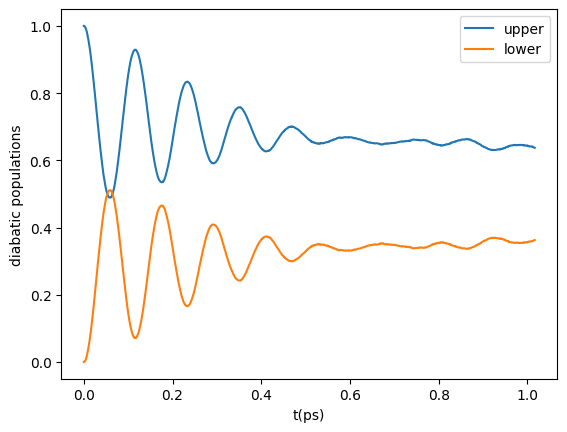

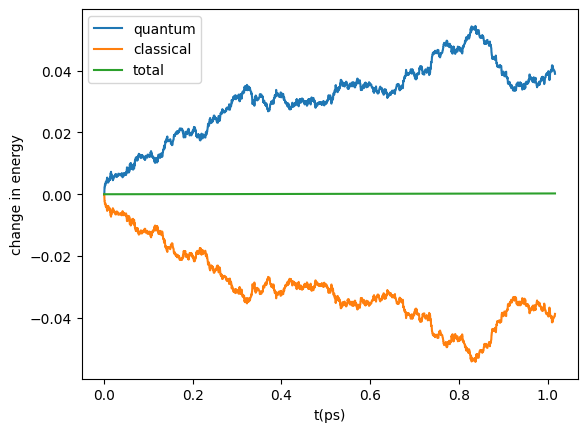

In [4]:
ntraj =  num_seeds
pops_mf = np.real(np.einsum('nii->ni',data_spin_boson_mf.data_dic['dm_db']))/ntraj
t_ps = data_spin_boson_mf.data_dic['t'] * 0.0260677 /ntraj
e_q = data_spin_boson_mf.data_dic['e_q']/ntraj
e_c = data_spin_boson_mf.data_dic['e_c']/ntraj

plt.plot(t_ps, pops_mf[:,0], label='upper')
plt.plot(t_ps, pops_mf[:,1], label='lower')
plt.ylabel('diabatic populations')
plt.xlabel('t(ps)')
plt.legend()
#plt.ylim([0,1])
plt.show()

plt.plot(t_ps, e_q - e_q[0], label='quantum')
plt.plot(t_ps, e_c - e_c[0], label='classical')
plt.plot(t_ps, e_c - e_c[0] + e_q - e_q[0], label='total')
plt.ylabel('change in energy')
plt.xlabel('t(ps)')
plt.legend()
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#import qclab.simulation as simulation
from qclab.models.spin_boson import SpinBosonModel
from qclab.algorithms.mf import MeanFieldDynamics
#from qclab.algorithms.fssh import FewestSwitchesSurfaceHoppingDynamics
#from qclab.algorithms.cfssh import CoherentFewestSwitchesSurfaceHoppingDynamics
from qclab.drivers.ray_driver import dynamics_parallel_ray
from qclab.drivers.serial_driver import dynamics_serial

input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
sim = SpinBosonModel(input_params = input_params)

sim.num_trajs = 200
sim.tmax=int(1/0.0260677)+1
sim.dt_output=0.01
sim.dt=1/(10*sim.w[-1])

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1

num_seeds = 100*sim.num_trajs
seeds = np.arange(0, num_seeds)

data_spin_boson_mf = dynamics_serial(MeanFieldDynamics, sim, seeds)

100%|██████████| 100/100 [12:06<00:00,  7.27s/it]


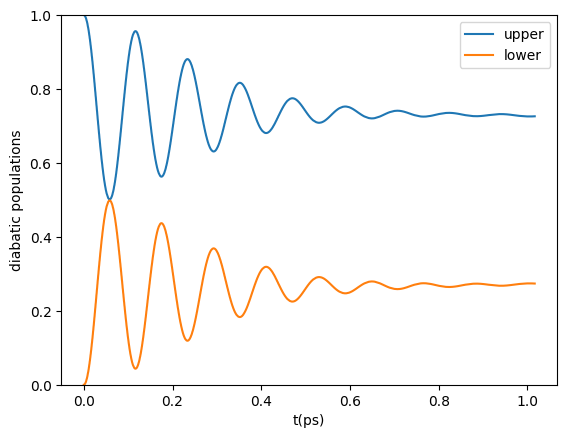

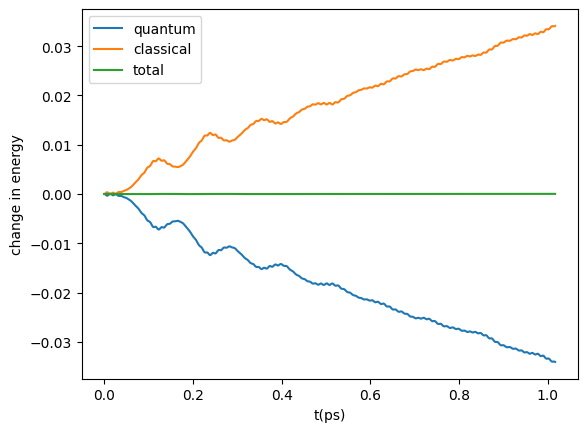

In [23]:
ntraj =  num_seeds
pops_mf = np.real(np.einsum('nii->ni',data_spin_boson_mf.data_dic['dm_db']))/ntraj
t_ps = data_spin_boson_mf.data_dic['t'] * 0.0260677 /ntraj
e_q = data_spin_boson_mf.data_dic['e_q']/ntraj
e_c = data_spin_boson_mf.data_dic['e_c']/ntraj

plt.plot(t_ps, pops_mf[:,0], label='upper')
plt.plot(t_ps, pops_mf[:,1], label='lower')
plt.ylabel('diabatic populations')
plt.xlabel('t(ps)')
plt.legend()
plt.ylim([0,1])
plt.savefig('pops_sb_mf.pdf')
plt.savefig('pops_sb_mf.svg')
plt.savefig('pops_sb_mf.png')
plt.show()

plt.plot(t_ps, e_q - e_q[0], label='quantum')
plt.plot(t_ps, e_c - e_c[0], label='classical')
plt.plot(t_ps, e_c - e_c[0] + e_q - e_q[0], label='total')
plt.ylabel('change in energy')
plt.xlabel('t(ps)')
plt.legend()
plt.savefig('de_sb_mf.pdf')
plt.savefig('de_sb_mf.svg')
plt.savefig('de_sb_mf.png')
plt.show()

In [4]:
input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
sim = SpinBosonModel(input_params = input_params)

sim.num_trajs = 200
sim.tmax=int(1/0.0260677)+1
sim.dt_output=0.01
sim.dt=1/(10*sim.w[-1])

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 100*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_mf = dynamics_parallel_ray(MeanFieldDynamics, sim, seeds, nprocs)#, simulation.Data())

2024-07-19 08:50:45,275	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/13 [00:00<?, ?it/s](raylet) [2024-07-19 08:50:55,193 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17947889664; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-19 08:51:05,220 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17947828224; capacity: 493949374464. Object creation will fail if spilling is required.
  8%|▊         | 1/13 [00:23<04:42, 23.52s/it](raylet) [2024-07-19 08:51:15,267 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17947795456; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-19 08:51:25,286 E 1519267 

KeyboardInterrupt: 

(raylet) [2024-07-19 08:54:55,827 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17946300416; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-19 08:55:05,838 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17946234880; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-19 08:55:15,847 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17946112000; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-19 08:55:25,855 E 1519267 1519289] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-19_08-50-43_703275_1518367 is over 95% full, available space: 17946103808; capacity: 49394

In [6]:
input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
sim = SpinBosonModel(input_params = input_params)

sim.num_trajs = 20
sim.tmax=int(1/0.0260677)+1
sim.dt_output=0.01
sim.dt=1/(10*sim.w[-1])

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 10*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_fssh = dynamics_parallel_ray(FewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-15 13:53:44,222	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/2 [00:00<?, ?it/s](raylet) [2024-07-15 13:53:54,149 E 1165999 1166021] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-53-42_635297_1164054 is over 95% full, available space: 18829627392; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:54:04,177 E 1165999 1166021] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-53-42_635297_1164054 is over 95% full, available space: 18829406208; capacity: 493949374464. Object creation will fail if spilling is required.
100%|██████████| 2/2 [00:33<00:00, 16.53s/it]


In [4]:
input_params = dict(temp = 1, V=0.5, E=0.5, A=100, W=0.1, l=0.02/4)
sim = SpinBosonModel(input_params = input_params)

sim.num_trajs = 20
sim.tmax=int(1/0.0260677)+1
sim.dt_output=0.01
sim.dt=1/(10*sim.w[-1])

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 10*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_cfssh = dynamics_parallel_ray(CoherentFewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-15 13:51:00,791	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/2 [00:00<?, ?it/s](raylet) [2024-07-15 13:51:10,714 E 1165246 1165269] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-50-59_102509_1164054 is over 95% full, available space: 18830163968; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:51:20,737 E 1165246 1165269] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-50-59_102509_1164054 is over 95% full, available space: 18830848000; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:51:30,750 E 1165246 1165269] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-50-59_102509_1164054 is over 95% full, available space: 18830839808; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:51:40,773 E 1165246 1165269] (raylet) file_system_monitor.cc:111: /

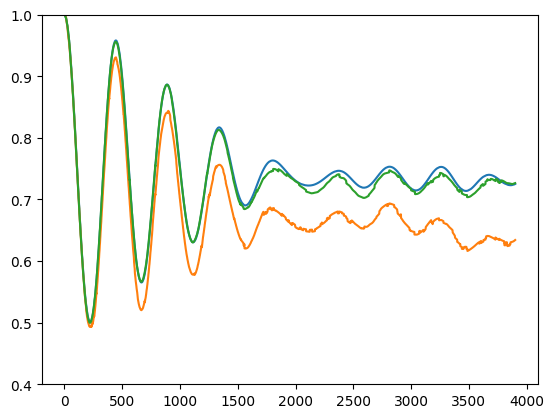

In [5]:
pops_fssh = np.real(np.einsum('nii->ni',data_fssh.data_dic['dm_db']))
ntraj = np.sum(pops_fssh[0])
pops_fssh = pops_fssh/ntraj

pops_mf = np.real(np.einsum('nii->ni',data_mf.data_dic['dm_db']))
ntraj = np.sum(pops_mf[0])
pops_mf = pops_mf/ntraj

pops_cfssh = np.real(np.einsum('nii->ni',data_cfssh.data_dic['dm_db']))
ntraj = np.sum(pops_cfssh[0])
pops_cfssh = pops_cfssh/ntraj

plt.plot(pops_mf[:,0])
plt.plot(pops_fssh[:,0])
plt.plot(pops_cfssh[:,0])
plt.ylim([0.4,1])
plt.show()